<a id='BayesianNetwork'></a>

## <b><span style='color:#2865C8'></span> Bayesian Network </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> What is Bayesian Network? </b></p>
</div>

### Bayesian Network

Bayesian Network is a kind of Graphical model called a Directed Acyclic Graph or DAG. It means all the edges (arcs) in the graph are directed, and there are no cycles. Each edge in the Bayesian Network encodes a joint probability factorization which would ne the the joint distribution of all nodes (variables/vertices).

$p(A, B, C) = P(A|B).P(C|B).P(C)$

### Inference

The inference would be the definition of a task that is responsible to compute the probability of each node in the Bayesian Network, assuming the known values of the other nodes. There are two different types of inference; exact and approximate.

#### Exact Inference

Different exact approaches to finding the node's probability have been applied in this notebook, such as variable elimination and junction tree algorithm.

<a id='lib'></a>
# <b><span style='color:#2865C8'></span> Importing libraries</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Used libraries for the notebook </b></p>
</div>

In [3]:
!pip install pgmpy

In [4]:
from pgmpy.models import BayesianNetwork

In [5]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import networkx as nx
from scipy.io import arff
import matplotlib.pyplot as plt
import pgmpy.estimators as ests
from pgmpy.estimators import TreeSearch,BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import structure_score
from sklearn.metrics import accuracy_score
from pgmpy.inference import BeliefPropagation
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
random_state = 123
np.random.seed(random_state)
warnings.simplefilter('ignore')
np.set_printoptions(precision=2, suppress=True)

<a id='Importingdataset'></a>

# <b><span style='color:#2865C8'></span> Importing dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>

In [98]:
df=pd.read_csv('/content/DATASET FOR CASESTUDY - DATASET FOR CASESTUDY.csv')

In [99]:
df.isnull().sum(axis=0)

Year                                  0
State Abbreviation                    0
Indian States                         0
Chronic Diseases                      0
Family Living Status                  0
GENDER                                0
Age in years                          0
Education                             0
Income                            37465
Psychological Health                  0
Psychosocial Factors              41980
Sleep duration(Hrs)                   0
Frequency of healthcare visits        0
Follows a Diet Plan                   0
Obesity / Weight Status               0
Physical Activity                     0
dtype: int64

In [100]:
len(df)

233875

In [101]:
df.head()

,Year,State Abbreviation,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Income,Psychological Health,Psychosocial Factors,Sleep duration(Hrs),Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity
0,2021,PB,Punjab,Asthma,Nuclear,Female,25-34,Graduation,2186613.0,Good,Alcohol,7,Quarterly,1,0,0
1,2019,PB,Punjab,Chronic Obstructive Pulmonary Disease,Roomates,Male,65 and above,Post Graduation,4712953.0,Good,Prescriptive Drugs,6,Annual,1,0,0
2,2018,MH,Maharashtra,Cardiovascular Disease,Nuclear,Male,55-64,High School,NaN,Bad,Prescriptive Drugs,11,Biannual,1,0,0
3,2018,RJ,Rajasthan,Chronic Obstructive Pulmonary Disease,Nuclear,Female,25-34,High School,NaN,Good,Prescriptive Drugs,12,Episodic Visits,1,0,0
4,2021,UK,Uttarakhand,Arthritis,Nuclear,Female,18-24,High School,NaN,Good,Prescriptive Drugs,10,Biannual,1,0,0


In [102]:
df.drop(columns=['State Abbreviation'],axis=1,inplace=True)

In [103]:
df.head()

,Year,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Income,Psychological Health,Psychosocial Factors,Sleep duration(Hrs),Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity
0,2021,Punjab,Asthma,Nuclear,Female,25-34,Graduation,2186613.0,Good,Alcohol,7,Quarterly,1,0,0
1,2019,Punjab,Chronic Obstructive Pulmonary Disease,Roomates,Male,65 and above,Post Graduation,4712953.0,Good,Prescriptive Drugs,6,Annual,1,0,0
2,2018,Maharashtra,Cardiovascular Disease,Nuclear,Male,55-64,High School,NaN,Bad,Prescriptive Drugs,11,Biannual,1,0,0
3,2018,Rajasthan,Chronic Obstructive Pulmonary Disease,Nuclear,Female,25-34,High School,NaN,Good,Prescriptive Drugs,12,Episodic Visits,1,0,0
4,2021,Uttarakhand,Arthritis,Nuclear,Female,18-24,High School,NaN,Good,Prescriptive Drugs,10,Biannual,1,0,0


In [104]:
df['Income'].describe()

count    1.964100e+05
mean     1.355391e+06
std      1.394714e+06
min      1.000000e+03
25%      3.594412e+05
50%      7.042130e+05
75%      2.109548e+06
max      4.999998e+06
Name: Income, dtype: float64

In [105]:
income_mean = df['Income'].mean()

In [106]:
income_null_mask = df['Income'].isnull()

In [107]:
df.loc[income_null_mask, 'Income'] = income_mean

In [108]:
df['Sleep duration(Hrs)'].describe()

count    233875.000000
mean          7.691339
std           2.555662
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          15.000000
Name: Sleep duration(Hrs), dtype: float64

In [109]:
df['Income_Category'] = pd.cut(df['Income'], bins=[0, 359412, 704213, 2109548, df['Income'].max()],
                               labels=['Low', 'Lower Middle', 'Higher Middle', 'High'])

In [110]:
bins = [0, 6, 8, 9, df['Sleep duration(Hrs)'].max()]
labels = ['Very short', 'Short', 'Normal', 'Long']

In [111]:
df['Sleep_Category'] = pd.cut(df['Sleep duration(Hrs)'], bins=bins, labels=labels)

In [112]:
df.columns

Index(['Year', 'Indian States', 'Chronic Diseases', 'Family Living Status',
       'GENDER', 'Age in years', 'Education', 'Income', 'Psychological Health',
       'Psychosocial Factors', 'Sleep duration(Hrs)',
       'Frequency of healthcare visits', 'Follows a Diet Plan',
       'Obesity / Weight Status', 'Physical Activity', 'Income_Category',
       'Sleep_Category'],
      dtype='object')

In [113]:
df.drop(columns=['Sleep duration(Hrs)','Income'],axis=1,inplace=True)

In [114]:
df.head()

,Year,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Psychological Health,Psychosocial Factors,Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity,Income_Category,Sleep_Category
0,2021,Punjab,Asthma,Nuclear,Female,25-34,Graduation,Good,Alcohol,Quarterly,1,0,0,High,Short
1,2019,Punjab,Chronic Obstructive Pulmonary Disease,Roomates,Male,65 and above,Post Graduation,Good,Prescriptive Drugs,Annual,1,0,0,High,Very short
2,2018,Maharashtra,Cardiovascular Disease,Nuclear,Male,55-64,High School,Bad,Prescriptive Drugs,Biannual,1,0,0,Higher Middle,Long
3,2018,Rajasthan,Chronic Obstructive Pulmonary Disease,Nuclear,Female,25-34,High School,Good,Prescriptive Drugs,Episodic Visits,1,0,0,Higher Middle,Long
4,2021,Uttarakhand,Arthritis,Nuclear,Female,18-24,High School,Good,Prescriptive Drugs,Biannual,1,0,0,Higher Middle,Long


In [115]:
df.to_csv('new_dataset.csv')

In [116]:
df.columns

Index(['Year', 'Indian States', 'Chronic Diseases', 'Family Living Status',
       'GENDER', 'Age in years', 'Education', 'Psychological Health',
       'Psychosocial Factors', 'Frequency of healthcare visits',
       'Follows a Diet Plan', 'Obesity / Weight Status', 'Physical Activity',
       'Income_Category', 'Sleep_Category'],
      dtype='object')

In [117]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and label encode if it's categorical
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [118]:
df.head()

,Year,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Psychological Health,Psychosocial Factors,Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity,Income_Category,Sleep_Category
0,2021,24,1,1,0,1,0,1,0,4,1,0,0,High,Short
1,2019,24,5,2,1,5,3,1,2,0,1,0,0,High,Very short
2,2018,17,3,1,1,4,1,0,2,1,1,0,0,Higher Middle,Long
3,2018,25,5,1,0,1,1,1,2,2,1,0,0,Higher Middle,Long
4,2021,31,0,1,0,0,1,1,2,1,1,0,0,Higher Middle,Long


In [119]:
df.columns

Index(['Year', 'Indian States', 'Chronic Diseases', 'Family Living Status',
       'GENDER', 'Age in years', 'Education', 'Psychological Health',
       'Psychosocial Factors', 'Frequency of healthcare visits',
       'Follows a Diet Plan', 'Obesity / Weight Status', 'Physical Activity',
       'Income_Category', 'Sleep_Category'],
      dtype='object')

In [120]:
df.isnull().sum()

Year                              0
Indian States                     0
Chronic Diseases                  0
Family Living Status              0
GENDER                            0
Age in years                      0
Education                         0
Psychological Health              0
Psychosocial Factors              0
Frequency of healthcare visits    0
Follows a Diet Plan               0
Obesity / Weight Status           0
Physical Activity                 0
Income_Category                   0
Sleep_Category                    0
dtype: int64

In [121]:
df.dropna(inplace=True)

<a id='Definingtheinputdata'></a>

## <b><span style='color:#2865C8'></span> Defining the input data</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> return X, y </b></p>
</div>

In [124]:
X = df.drop(columns=['Psychological Health'],axis=1)
y = df['Psychological Health']

In [123]:
df.columns

Index(['Year', 'Indian States', 'Chronic Diseases', 'Family Living Status',
       'GENDER', 'Age in years', 'Education', 'Psychological Health',
       'Psychosocial Factors', 'Frequency of healthcare visits',
       'Follows a Diet Plan', 'Obesity / Weight Status', 'Physical Activity',
       'Income_Category', 'Sleep_Category'],
      dtype='object')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Every variable seems of good importanc in the chi square test so we are not dropping any of the columns as of now without proper use of PGM Algorithms </b></p>
</div>

In [125]:
data = df

In [126]:
data.head()

,Year,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Psychological Health,Psychosocial Factors,Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity,Income_Category,Sleep_Category
0,2021,24,1,1,0,1,0,1,0,4,1,0,0,High,Short
1,2019,24,5,2,1,5,3,1,2,0,1,0,0,High,Very short
2,2018,17,3,1,1,4,1,0,2,1,1,0,0,Higher Middle,Long
3,2018,25,5,1,0,1,1,1,2,2,1,0,0,Higher Middle,Long
4,2021,31,0,1,0,0,1,1,2,1,1,0,0,Higher Middle,Long


In [127]:
data['Psychological Health1']=data['Psychological Health']

In [128]:
data.drop(columns='Psychological Health',axis=1,inplace=True)

In [129]:
data.head()

,Year,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Psychosocial Factors,Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity,Income_Category,Sleep_Category,Psychological Health1
0,2021,24,1,1,0,1,0,0,4,1,0,0,High,Short,1
1,2019,24,5,2,1,5,3,2,0,1,0,0,High,Very short,1
2,2018,17,3,1,1,4,1,2,1,1,0,0,Higher Middle,Long,0
3,2018,25,5,1,0,1,1,2,2,1,0,0,Higher Middle,Long,1
4,2021,31,0,1,0,0,1,2,1,1,0,0,Higher Middle,Long,1


In [130]:
data.to_csv('data.csv')

<a id='BayesianModels'></a>

# <b><span style='color:#2865C8'></span> Bayesian Models</b>


## <b><span style='color:#2865C8'></span> DAG </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Probabilistic Directed Acyclic Graphical - pDAG </b></p>
</div>


#### To have the Bayesian Network over this example, we need to define dependencies between pairwise variables.

#### For the structure learning techniques, There are various standards such as Hill Climb search, Structure score, Tree search, Exhaustive search, etc. The one I used for this illustration was the Tree search.

Building tree:   0%|          | 0/105.0 [00:00<?, ?it/s]

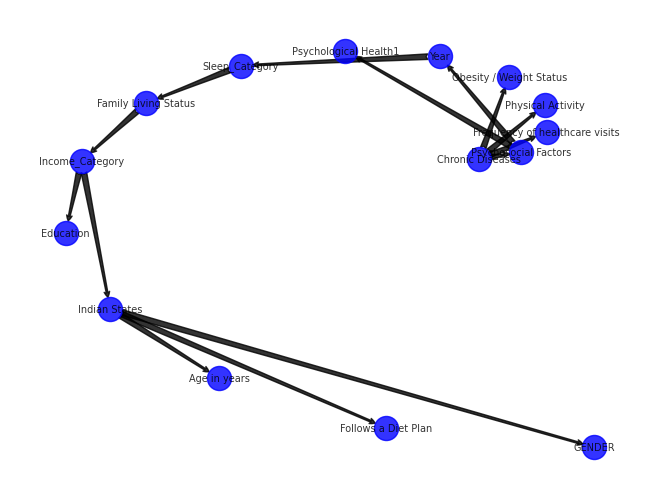

In [131]:
est = TreeSearch(data, root_node='Chronic Diseases')
dag = est.estimate(estimator_type='chow-liu')
pos = nx.spiral_layout(dag)
nx.draw(dag, pos=pos, with_labels=True,node_color='b', font_size=7, arrowstyle='fancy', alpha=0.8)

1. **Compute Mutual Information:**
   - Calculate mutual information \(I(X_i; X_j)\) for each pair of variables \(X_i\) and \(X_j\) in the dataset. This quantifies the strength of the relationship between variables.

2. **Build Fully Connected Graph:**
   - Form a fully connected undirected graph, where nodes represent variables and edges denote the mutual information between corresponding variable pairs.

3. **Compute Maximum Spanning Tree:**
   - Apply a maximum spanning tree algorithm (e.g., Kruskal's or Prim's) to identify the tree structure that connects all nodes while minimizing edge weights. Edges in this tree represent the strongest pairwise dependencies.

4. **Convert to DAG:**
   - Designate a root node and orient edges to create a directed acyclic graph (DAG). The root becomes the parent, and other nodes are its children in the directed structure.

5. **Resulting Bayesian Network:**
   - The DAG signifies the Bayesian Network structure. Nodes represent variables, and directed edges denote conditional dependencies between variables. The algorithm assumes relationships can be approximated by a tree structure.

6. **Parameter Estimation:**
   - Estimate Bayesian Network parameters based on the dataset.
   - For each DAG node, estimate the conditional probability distribution given its parent(s).

7. **Bayesian Network Construction:**
   - Combine the learned DAG structure with estimated parameters to construct the complete Bayesian Network.

<a id='INFOs'></a>

## <b><span style='color:#2865C8'></span> DAG INFOs</b>

In [132]:
print("Nodes: ", dag.nodes())
print("---------------")
print("Edges: ", dag.edges())

print("--------" "\n")

nx.to_pandas_edgelist(dag)

Nodes:  ['Chronic Diseases', 'Psychosocial Factors', 'Frequency of healthcare visits', 'Physical Activity', 'Obesity / Weight Status', 'Year', 'Psychological Health1', 'Sleep_Category', 'Family Living Status', 'Income_Category', 'Education', 'Indian States', 'Age in years', 'Follows a Diet Plan', 'GENDER']
---------------
Edges:  [('Chronic Diseases', 'Psychosocial Factors'), ('Chronic Diseases', 'Frequency of healthcare visits'), ('Chronic Diseases', 'Physical Activity'), ('Chronic Diseases', 'Obesity / Weight Status'), ('Psychosocial Factors', 'Year'), ('Psychosocial Factors', 'Psychological Health1'), ('Year', 'Sleep_Category'), ('Sleep_Category', 'Family Living Status'), ('Family Living Status', 'Income_Category'), ('Income_Category', 'Education'), ('Income_Category', 'Indian States'), ('Indian States', 'Age in years'), ('Indian States', 'Follows a Diet Plan'), ('Indian States', 'GENDER')]
--------



,source,target,weight
0,Chronic Diseases,Psychosocial Factors,None
1,Chronic Diseases,Frequency of healthcare visits,None
2,Chronic Diseases,Physical Activity,None
3,Chronic Diseases,Obesity / Weight Status,None
4,Psychosocial Factors,Year,None
5,Psychosocial Factors,Psychological Health1,None
6,Year,Sleep_Category,None
7,Sleep_Category,Family Living Status,None
8,Family Living Status,Income_Category,None
9,Income_Category,Education,None


<a id='Conditionalprobability'></a>

## <b><span style='color:#2865C8'></span> Bayesian Network</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Return the (Estimation of) Conditional probability based on the time as the root node. </b></p>
</div>

In [133]:
from IPython.display import Image, display

Building tree:   0%|          | 0/105.0 [00:00<?, ?it/s]

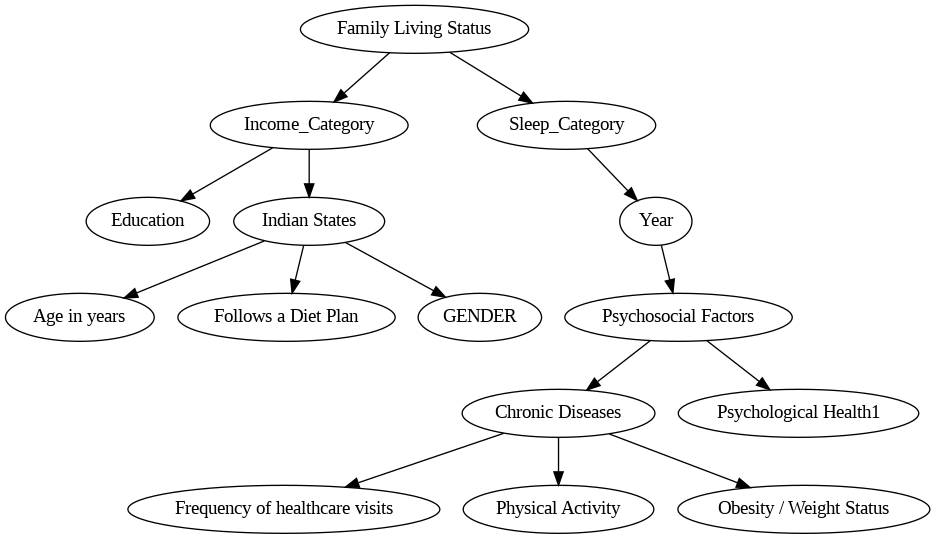

In [134]:
hc1 = TreeSearch(data, root_node='Family Living Status')
est_model1 = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

The code is designed to explore and visualize the hierarchical structure within a dataset. It uses a custom TreeSearch class to estimate the hierarchy, with the root node set to 'Age.' The resulting hierarchical model is represented as a directed graph, and the code converts it into a visual format for better understanding.

This visualization aids in comprehending the relationships and dependencies within the data, facilitating a more intuitive exploration of its organizational structure.

The combination of the TreeSearch class and NetworkX provides a powerful tool for hierarchical analysis and visualization in a Python environment.

In [135]:
model = BayesianNetwork(dag)
model.fit(data)
model.get_cpds()

[<TabularCPD representing P(Chronic Diseases:7) at 0x79cb53b176a0>,
 <TabularCPD representing P(Psychosocial Factors:5 | Chronic Diseases:7) at 0x79cb53b17a90>,
 <TabularCPD representing P(Frequency of healthcare visits:6 | Chronic Diseases:7) at 0x79cb53b17f10>,
 <TabularCPD representing P(Physical Activity:2 | Chronic Diseases:7) at 0x79cb53b17820>,
 <TabularCPD representing P(Obesity / Weight Status:2 | Chronic Diseases:7) at 0x79cb53b17a60>,
 <TabularCPD representing P(Year:5 | Psychosocial Factors:5) at 0x79cb53b17dc0>,
 <TabularCPD representing P(Psychological Health1:2 | Psychosocial Factors:5) at 0x79cb53b17be0>,
 <TabularCPD representing P(Sleep_Category:4 | Year:5) at 0x79cb53b17910>,
 <TabularCPD representing P(Family Living Status:4 | Sleep_Category:4) at 0x79cb53b17fd0>,
 <TabularCPD representing P(Income_Category:4 | Family Living Status:4) at 0x79cb53b17fa0>,
 <TabularCPD representing P(Education:5 | Income_Category:4) at 0x79cb53b17b80>,
 <TabularCPD representing P(Indi

In [136]:
df.columns

Index(['Year', 'Indian States', 'Chronic Diseases', 'Family Living Status',
       'GENDER', 'Age in years', 'Education', 'Psychosocial Factors',
       'Frequency of healthcare visits', 'Follows a Diet Plan',
       'Obesity / Weight Status', 'Physical Activity', 'Income_Category',
       'Sleep_Category', 'Psychological Health1'],
      dtype='object')

Retrieves the Conditional Probability Distributions (CPDs) for each variable in the Bayesian Network using the get_cpds method. CPDs provide the probability of a variable given its parents in the network.

Building tree:   0%|          | 0/105.0 [00:00<?, ?it/s]

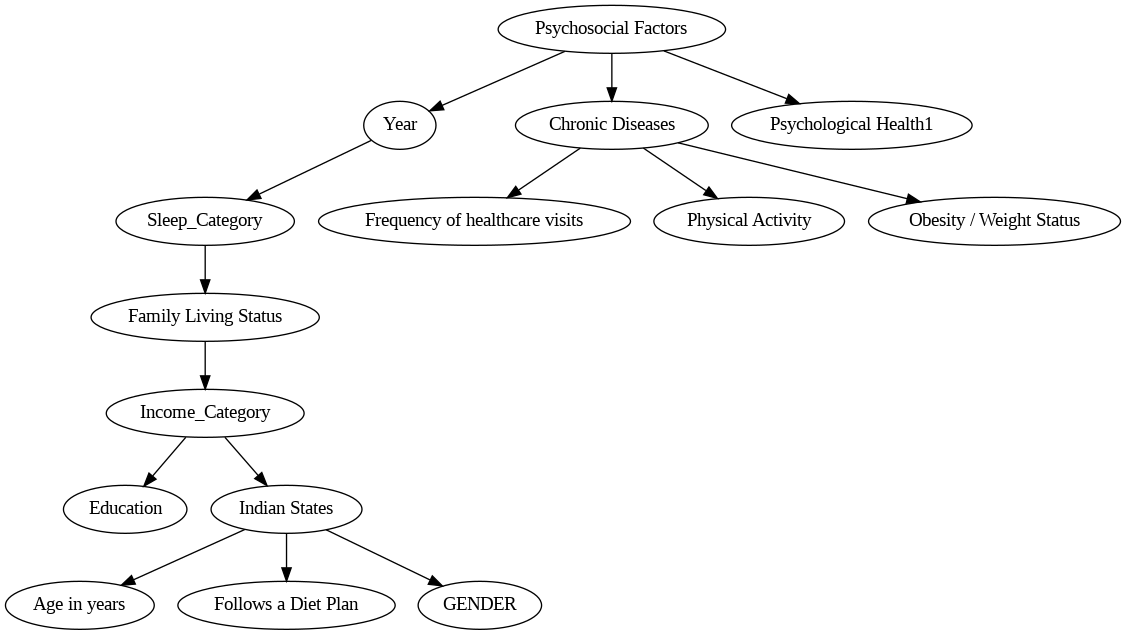

In [137]:
hc1 = TreeSearch(data, root_node='Psychosocial Factors')
est_model1 = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

<a id='Inference'></a>

## <b><span style='color:#2865C8'></span> Inference</b>

### <b><span style='color:#2865C8'></span> Variable Elimination</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Initialize the inference by Variable Elimination method </b></p>
</div>

In [139]:
infer = VariableElimination(model)
q = infer.query(variables=['Psychological Health1'], evidence={"Psychosocial Factors": 2}, joint=False)
print(q['Psychological Health1'])

+--------------------------+------------------------------+
| Psychological Health1    |   phi(Psychological Health1) |
+==========================+==============================+
| Psychological Health1(0) |                       0.3986 |
+--------------------------+------------------------------+
| Psychological Health1(1) |                       0.6014 |
+--------------------------+------------------------------+


In [140]:
from pgmpy.estimators import MaximumLikelihoodEstimator
for variable in model.nodes:
    cpd = MaximumLikelihoodEstimator(model, data).estimate_cpd(variable)
    model.add_cpds(cpd)

# Function to calculate Min-fill heuristic for a variable in a graph
def min_fill_heuristic(graph, variable):
    neighbors = set(graph.neighbors(variable))
    fill_edges = set()

    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and not graph.has_edge(neighbor1, neighbor2):
                fill_edges.add((neighbor1, neighbor2))

    return len(fill_edges)

# Find the variable elimination order using Min-fill heuristic
elimination_order_ = []
remaining_variables_ = set(model.nodes)

# Reverse the order to start eliminating from variables with fewer dependencies
while remaining_variables_:
    variable_scores_ = {variable: min_fill_heuristic(model, variable) for variable in remaining_variables_}
    min_score_variable_ = min(variable_scores_, key=variable_scores_.get)

    # Add "DEATH_EVENT" at the end of the elimination order
    if min_score_variable_ != 'Feeling anxious':
        elimination_order_.append(min_score_variable_)

    remaining_variables_.remove(min_score_variable_)

# Print the calculated variable elimination order
print("Variable Elimination Order:", elimination_order_)

# Perform Variable Elimination with the calculated order
infer = VariableElimination(model)

Variable Elimination Order: ['GENDER', 'Follows a Diet Plan', 'Family Living Status', 'Age in years', 'Education', 'Sleep_Category', 'Psychological Health1', 'Frequency of healthcare visits', 'Physical Activity', 'Year', 'Obesity / Weight Status', 'Income_Category', 'Psychosocial Factors', 'Indian States', 'Chronic Diseases']


Updating the Conditional Probability Distributions (CPDs) in a Bayesian Network using Maximum Likelihood Estimation (MLE) and then determining an efficient variable elimination order based on the Min-fill heuristic.

The code iterates through each variable in the network, estimates its CPD using MLE, and incorporates the updated CPD into the model. Following this, the Min-fill heuristic is applied to find an optimal order for variable elimination, considering the minimal number of edges to be added.

The resulting elimination order is printed, and Variable Elimination is performed on the Bayesian Network using this order. This process streamlines probabilistic inference by eliminating variables strategically, enhancing computational efficiency.




<a id='Prediction'></a>

## <b><span style='color:#2865C8'></span> Prediction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Initialize the inference by Variable Elimination method </b></p>
</div>

In [141]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
import networkx as nx

In [142]:
test = np.squeeze(data.iloc[:, -1].values)
predict_data = data.iloc[:, :-1]
y_pred = model.predict(predict_data)
print(accuracy_score(np.squeeze(y_pred.values), test))

  0%|          | 0/231841 [00:00<?, ?it/s]

0.6528615713522181


In [45]:
model = BayesianNetwork(dag)
model.fit(data)
model.get_cpds()

[<TabularCPD representing P(Chronic Diseases:7) at 0x79cb686842e0>,
 <TabularCPD representing P(Psychosocial Factors:5 | Chronic Diseases:7) at 0x79cb6869afb0>,
 <TabularCPD representing P(Frequency of healthcare visits:6 | Chronic Diseases:7) at 0x79cb686995a0>,
 <TabularCPD representing P(Physical Activity:2 | Chronic Diseases:7) at 0x79cb68699750>,
 <TabularCPD representing P(Obesity / Weight Status:2 | Chronic Diseases:7) at 0x79cb6869a500>,
 <TabularCPD representing P(Year:5 | Psychosocial Factors:5) at 0x79cb6869a590>,
 <TabularCPD representing P(Psychological Health:2 | Psychosocial Factors:5) at 0x79cb68698e20>,
 <TabularCPD representing P(Sleep_Category:4 | Year:5) at 0x79cb6869b340>,
 <TabularCPD representing P(Family Living Status:4 | Sleep_Category:4) at 0x79cb6869abc0>,
 <TabularCPD representing P(Income_Category:4 | Family Living Status:4) at 0x79cb68699780>,
 <TabularCPD representing P(Education:5 | Income_Category:4) at 0x79cb68698e80>,
 <TabularCPD representing P(India

Updates Conditional Probability Distributions (CPDs) in a Bayesian Network using Maximum Likelihood Estimation (MLE) and then determines an optimal variable elimination order based on the Min-fill heuristic.

The loop iterates through each variable in the model, estimates its CPD using MLE, and adds the updated CPD to the model. The Min-fill heuristic is then applied to find a strategic variable elimination order, considering the minimal number of edges to be added.

The calculated elimination order is printed, and Variable Elimination is performed on the Bayesian Network using this order, enhancing computational efficiency for probabilistic inference.

<a id='Prediction'></a>

## <b><span style='color:#2865C8'></span> Prediction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Initialize the inference by Variable Elimination method </b></p>
</div>

In [143]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
import networkx as nx

In [ ]:
hc1 = HillClimbSearch(df, HillClimbSearch(df))
est_model1 = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

  0%|          | 0/1000000 [00:00<?, ?it/s]

Like a detective trying to figure out the best way to represent relationships in a dataset. It uses a method called "hill climb search" twice to explore and discover the most likely connections between different pieces of information in the dataset (df).

The result is a visual representation of these relationships, kind of like a map of connections, which is then displayed for easier understanding.

So, it's essentially a tool for uncovering and showing the important links within the data.

In [ ]:
hc = HillClimbSearch(df)
best_model = hc.estimate()
edges = list(best_model.edges())
model = BayesianNetwork(edges)

In [ ]:
# Fitting the data to the model using Maximum Likelihood Estimator
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Doing exact inference using Variable Elimination
infer = VariableElimination(model)

In [ ]:
model.get_cpds

In [ ]:
df.columns

In [ ]:
infer = VariableElimination(model)
q = infer.query(variables=['Psychological Health1'], evidence={"Psychosocial Factors": 2}, joint=False)
print(q['Psychological Health1'])

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
for variable in model.nodes:
    cpd = MaximumLikelihoodEstimator(model, data).estimate_cpd(variable)
    model.add_cpds(cpd)

# Function to calculate Min-fill heuristic for a variable in a graph
def min_fill_heuristic(graph, variable):
    neighbors = set(graph.neighbors(variable))
    fill_edges = set()

    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and not graph.has_edge(neighbor1, neighbor2):
                fill_edges.add((neighbor1, neighbor2))

    return len(fill_edges)

# Find the variable elimination order using Min-fill heuristic
elimination_order = []
remaining_variables = set(model.nodes)

# Reverse the order to start eliminating from variables with fewer dependencies
while remaining_variables:
    variable_scores = {variable: min_fill_heuristic(model, variable) for variable in remaining_variables}
    min_score_variable = min(variable_scores, key=variable_scores.get)

    # Add "DEATH_EVENT" at the end of the elimination order
    if min_score_variable != 'Psychological Health':
        elimination_order.append(min_score_variable)

    remaining_variables.remove(min_score_variable)

# Print the calculated variable elimination order
print("Variable Elimination Order:", elimination_order)

# Perform Variable Elimination with the calculated order
infer = VariableElimination(model)

Updates a Bayesian Network by estimating Conditional Probability Distributions (CPDs) using Maximum Likelihood Estimation (MLE) for each variable. It then determines an efficient variable elimination order based on the Min-fill heuristic, a method to minimize computational complexity.

The calculated elimination order is printed, and Variable Elimination is performed on the Bayesian Network using this order, streamlining the process of obtaining probabilities for different variables.

The code is essentially refining and optimizing the Bayesian Network to make probabilistic inference more efficient.

In [ ]:
test = np.squeeze(data.iloc[:, -1].values)
predict_data = data.iloc[:, :-1]
y_pred = model.predict(predict_data)
print(accuracy_score(np.squeeze(y_pred.values), test))

<a id='Conclusion'></a>

## <b><span style='color:#2865C8'></span> Conclusion</b>
In this work, we considered a medical dataset to apply the Bayesian Network to compute the conditional probabilities based on the estimated Directed Acyclic Graph.

Different approaches were added also such as Markov Blanket, which could be useful in other purposes such as variable eliminations.
